# Customer Churn Prediction

- This competition is about predicting whether a customer will change telecommunications provider, something known as "churning".

- The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:

1. "state", string. 2-letter code of the US state of customer residence
2. "account_length", numerical. Number of months the customer has been with the current telco provider
3. "area_code", string="area_code_AAA" where AAA = 3 digit area code.
4. "international_plan", (yes/no). The customer has international plan.
5. "voice_mail_plan", (yes/no). The customer has voice mail plan.
6. "number_vmail_messages", numerical. Number of voice-mail messages.
7. "total_day_minutes", numerical. Total minutes of day calls.
8. "total_day_calls", numerical. Total minutes of day calls.
9. "total_day_charge", numerical. Total charge of day calls.
10. "total_eve_minutes", numerical. Total minutes of evening calls.
11. "total_eve_calls", numerical. Total number of evening calls.
12. "total_eve_charge", numerical. Total charge of evening calls.
13. "total_night_minutes", numerical. Total minutes of night calls.
14. "total_night_calls", numerical. Total number of night calls.
15. "total_night_charge", numerical. Total charge of night calls.
16. "total_intl_minutes", numerical. Total minutes of international calls.
17. "total_intl_calls", numerical. Total number of international calls.
18. "total_intl_charge", numerical. Total charge of international calls
19. "number_customer_service_calls", numerical. Number of calls to customer service
20. "churn", (yes/no). Customer churn - target variable.

The submissions will be evaluated using the test Accuracy criterion:

Accuracy=Number of correct predictions/Number of total test samples

In [1]:
import pandas as p
import numpy as n
import seaborn as sns

data=p.read_csv('train.csv')
data_test=p.read_csv('test.csv')
data_test_output=p.read_csv('sampleSubmission.csv')
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


## Data Distribution Analysis

data.churn.value_counts()

In [2]:
data.state.value_counts()

WV    139
MN    108
ID    106
AL    101
VA    100
OR     99
TX     98
UT     97
NY     96
NJ     96
WY     95
OH     95
WI     94
MA     89
ME     89
CT     88
RI     87
MI     87
KS     87
MD     86
VT     86
KY     85
NV     83
IN     83
MS     82
WA     80
NC     80
MO     80
DE     80
CO     80
MT     80
IL     79
TN     79
NM     78
OK     78
NH     78
HI     77
AZ     77
FL     76
SD     75
NE     73
DC     72
SC     72
AR     71
LA     69
PA     67
ND     67
GA     64
IA     62
AK     61
CA     39
Name: state, dtype: int64

In [3]:
data['international_plan'].value_counts()

no     3854
yes     396
Name: international_plan, dtype: int64

In [4]:
data.area_code.value_counts()

area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: area_code, dtype: int64

In [5]:
data.voice_mail_plan.value_counts()

no     3138
yes    1112
Name: voice_mail_plan, dtype: int64

<AxesSubplot:xlabel='number_vmail_messages', ylabel='Count'>

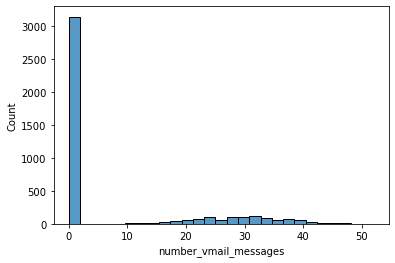

In [6]:
sns.histplot(data=data,x=data.number_vmail_messages)

In [7]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

In [8]:
data.number_customer_service_calls.value_counts()

1    1524
2     947
0     886
3     558
4     209
5      81
6      28
7      13
9       2
8       2
Name: number_customer_service_calls, dtype: int64

In [9]:
p.crosstab(data.international_plan,data.churn,normalize='index')

churn,no,yes
international_plan,,
no,0.888168,0.111832
yes,0.578283,0.421717


In [10]:
p.crosstab(data.voice_mail_plan,data.churn,normalize='index')

churn,no,yes
voice_mail_plan,,
no,0.835564,0.164436
yes,0.926259,0.073741


In [11]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [12]:
p.crosstab(data.area_code,data.churn,normalize='index')

churn,no,yes
area_code,,
area_code_408,0.860037,0.139963
area_code_415,0.863852,0.136148
area_code_510,0.849432,0.150568


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='account_length'>

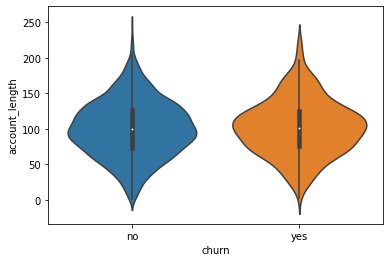

In [13]:
sns.violinplot(data.churn,data.account_length)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='number_vmail_messages'>

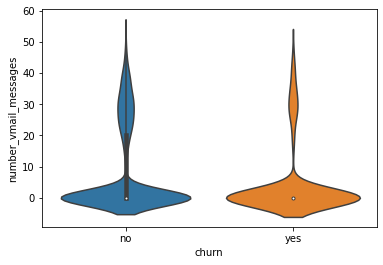

In [14]:
sns.violinplot(data.churn,data.number_vmail_messages)

In [15]:
data.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn'],
      dtype='object')

## Scaling Data and Categorical Data handling

In [16]:
data.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no


In [17]:
data2=data.copy()

In [18]:
from sklearn.preprocessing import StandardScaler
import pandas as p
import numpy as n
#scale=StandardScaler()
#scale.fit_transform(n.asarray(data2['total_day_minutes']))
#data2['total_day_minutes']=(data2['total_day_minutes']-data2['total_day_minutes'].mean())/data2['total_day_minutes'].std()


In [19]:
for i in data2.columns[5:-1]:
    data2[i]=(data2[i]-data2[i].mean())/data2[i].std()
data2['account_length']=(data2['account_length']-data2['account_length'].mean())/data2['account_length'].std()
data2.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,0.170379,area_code_415,no,yes,1.366696,-0.345469,1.163313,-0.345747,-0.093014,0.141825,-0.092482,1.069877,0.157290,1.070694,1.247755,-0.579096,1.248444,-0.426296,no
1,NJ,0.926077,area_code_415,no,no,-0.567845,1.168999,0.709931,1.169158,-1.571635,0.493432,-1.572156,-0.753232,0.207058,-0.751964,0.704296,0.232899,0.698260,-1.188820,no
2,OH,-0.408990,area_code_408,yes,no,-0.567845,2.205798,-1.456227,2.205958,-2.751746,-0.611619,-2.752149,-0.072048,-0.539462,-0.072329,-1.324614,1.044894,-1.328031,0.336228,no
3,OK,-0.635699,area_code_415,yes,no,-0.567845,-0.251046,0.659555,-0.250997,-1.032326,1.096187,-1.031326,-0.270644,1.053115,-0.270924,-0.056545,-0.579096,-0.053212,1.098753,no
4,MA,0.523038,area_code_510,no,yes,1.217885,0.702439,-0.599839,0.701944,2.951791,0.392973,2.951150,0.239747,0.903811,0.241009,-0.998539,1.044894,-0.992552,1.098753,no


In [20]:
for i in data_test.columns[6:]:
    data_test[i]=(data_test[i]-data_test[i].mean())/data_test[i].std()
data_test['account_length']=(data_test['account_length']-data_test['account_length'].mean())/data_test['account_length'].std()
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,0.695601,area_code_415,no,yes,1.171458,1.589330,0.470555,1.589625,-0.112259,-0.065746,-0.112065,0.874818,-0.488431,0.874189,-0.106172,-0.613292,-0.106905,-0.497307
1,2,AL,0.443705,area_code_510,yes,no,-0.598615,0.806354,-0.138009,0.806525,0.332310,0.037520,0.332065,0.083067,0.918901,0.085028,-1.441748,0.625404,-1.444333,-1.280879
2,3,IA,-0.966909,area_code_415,no,no,-0.598615,-1.121983,-1.557992,-1.121956,1.991775,-1.253300,1.991353,0.065601,-0.071444,0.067779,1.012824,0.625404,1.016535,1.853409
3,4,VT,-0.186033,area_code_510,no,no,-0.598615,0.192366,0.673410,0.192415,0.286320,0.553848,0.286976,-1.358774,1.075271,-1.359610,-0.792009,-0.613292,-0.788994,1.069837
4,5,NE,1.854319,area_code_415,no,no,-0.598615,-1.054388,-1.253710,-1.054581,1.414986,0.605481,1.414209,0.991252,0.762531,0.990622,1.879143,0.212505,1.885863,1.069837


In [21]:
data2['churn']=[1 if  x=="yes" else 0 for x in data2.churn]
data2['international_plan']=[1 if  x=="yes" else 0 for x in data2.international_plan]
data2['voice_mail_plan']=[1 if  x=="yes" else 0 for x in data2.voice_mail_plan]
data2.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,0.170379,area_code_415,0,1,1.366696,-0.345469,1.163313,-0.345747,-0.093014,0.141825,-0.092482,1.069877,0.157290,1.070694,1.247755,-0.579096,1.248444,-0.426296,0
1,NJ,0.926077,area_code_415,0,0,-0.567845,1.168999,0.709931,1.169158,-1.571635,0.493432,-1.572156,-0.753232,0.207058,-0.751964,0.704296,0.232899,0.698260,-1.188820,0
2,OH,-0.408990,area_code_408,1,0,-0.567845,2.205798,-1.456227,2.205958,-2.751746,-0.611619,-2.752149,-0.072048,-0.539462,-0.072329,-1.324614,1.044894,-1.328031,0.336228,0
3,OK,-0.635699,area_code_415,1,0,-0.567845,-0.251046,0.659555,-0.250997,-1.032326,1.096187,-1.031326,-0.270644,1.053115,-0.270924,-0.056545,-0.579096,-0.053212,1.098753,0
4,MA,0.523038,area_code_510,0,1,1.217885,0.702439,-0.599839,0.701944,2.951791,0.392973,2.951150,0.239747,0.903811,0.241009,-0.998539,1.044894,-0.992552,1.098753,0


In [22]:
data_test['international_plan']=[1 if  x=="yes" else 0 for x in data_test.international_plan]
data_test['voice_mail_plan']=[1 if  x=="yes" else 0 for x in data_test.voice_mail_plan]
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,0.695601,area_code_415,0,1,1.171458,1.589330,0.470555,1.589625,-0.112259,-0.065746,-0.112065,0.874818,-0.488431,0.874189,-0.106172,-0.613292,-0.106905,-0.497307
1,2,AL,0.443705,area_code_510,1,0,-0.598615,0.806354,-0.138009,0.806525,0.332310,0.037520,0.332065,0.083067,0.918901,0.085028,-1.441748,0.625404,-1.444333,-1.280879
2,3,IA,-0.966909,area_code_415,0,0,-0.598615,-1.121983,-1.557992,-1.121956,1.991775,-1.253300,1.991353,0.065601,-0.071444,0.067779,1.012824,0.625404,1.016535,1.853409
3,4,VT,-0.186033,area_code_510,0,0,-0.598615,0.192366,0.673410,0.192415,0.286320,0.553848,0.286976,-1.358774,1.075271,-1.359610,-0.792009,-0.613292,-0.788994,1.069837
4,5,NE,1.854319,area_code_415,0,0,-0.598615,-1.054388,-1.253710,-1.054581,1.414986,0.605481,1.414209,0.991252,0.762531,0.990622,1.879143,0.212505,1.885863,1.069837


In [23]:
data2=p.concat([data2,p.get_dummies(data2.area_code)],axis=1)

In [24]:
data_test=p.concat([data_test,p.get_dummies(data_test.area_code)],axis=1)
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,1,KS,0.695601,area_code_415,0,1,1.171458,1.589330,0.470555,1.589625,...,0.874818,-0.488431,0.874189,-0.106172,-0.613292,-0.106905,-0.497307,0,1,0
1,2,AL,0.443705,area_code_510,1,0,-0.598615,0.806354,-0.138009,0.806525,...,0.083067,0.918901,0.085028,-1.441748,0.625404,-1.444333,-1.280879,0,0,1
2,3,IA,-0.966909,area_code_415,0,0,-0.598615,-1.121983,-1.557992,-1.121956,...,0.065601,-0.071444,0.067779,1.012824,0.625404,1.016535,1.853409,0,1,0
3,4,VT,-0.186033,area_code_510,0,0,-0.598615,0.192366,0.673410,0.192415,...,-1.358774,1.075271,-1.359610,-0.792009,-0.613292,-0.788994,1.069837,0,0,1
4,5,NE,1.854319,area_code_415,0,0,-0.598615,-1.054388,-1.253710,-1.054581,...,0.991252,0.762531,0.990622,1.879143,0.212505,1.885863,1.069837,0,1,0


In [25]:
data_save=data2.copy()

In [26]:
y=data2.churn

In [27]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4245    0
4246    0
4247    0
4248    0
4249    0
Name: churn, Length: 4250, dtype: int64

### Acuracy Function

In [28]:
import pandas as p
def cal_accuracy(actual,predicted):
    val=[]
    for i in range(0,len(actual)):
        if actual[i]==predicted[i]:
            val.append(1)
        else:
            val.append(0)
    return (sum(val)/len(val))
    
    

In [29]:
actual=p.Series([0,0,1,1])
predicted=p.Series([0,1,0,1])
cal_accuracy(actual,predicted)


0.5

### Response Coding/ Target Coding

In [30]:
s=[]
s1=[]
s2=[]
for i in data_save['state'].unique():
    #print(i)
    j=(len(data_save[(data_save['state']==i)&(data_save['churn']==0)]['churn']))
    k=(len(data_save[(data_save['state']==i)&(data_save['churn']==1)]['churn']))
    s.append(i)
    s1.append(j/(j+k))
    s2.append(k/(j+k))
x=p.DataFrame({'state':s,'state_0':s1,'state_1':s2})
data_save=x.merge(data_save,left_on='state',right_on='state')
data_save=data_save.drop('state',axis=1)
data_save=data_save.drop('area_code',axis=1)
data_save=data_save.drop('churn',axis=1)

### Preparing Test Data

In [31]:
data_test=x.merge(data_test,left_on='state',right_on='state')
# data_test=data_test.drop('state',axis=1)
# data_test=data_test.drop('area_code',axis=1)
data_test

,state,state_0,state_1,id,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,OH,0.873684,0.126316,71,-0.689824,area_code_415,0,0,-0.598615,0.055298,...,0.034552,-0.019320,0.033280,-1.008588,-0.613292,-1.002982,1.853409,0,1,0
1,OH,0.873684,0.126316,133,-0.992098,area_code_510,1,1,0.534232,-0.693881,...,-1.007532,-0.279937,-1.005997,0.363084,-0.613292,0.361195,-1.280879,0,0,1
2,OH,0.873684,0.126316,140,0.569653,area_code_408,0,0,-0.598615,-1.416772,...,1.132913,-0.384184,1.132930,1.662564,0.212505,1.658500,-1.280879,1,0,0
3,OH,0.873684,0.126316,154,-0.664634,area_code_415,0,0,-0.598615,-0.821560,...,1.274574,0.710407,1.275237,-0.178366,-0.200394,-0.173777,-1.280879,0,1,0
4,OH,0.873684,0.126316,229,-0.639445,area_code_510,0,1,1.313064,-1.182067,...,-0.101287,0.710407,-0.100403,-2.199778,1.038303,-2.206667,1.069837,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,ND,0.910448,0.089552,519,0.695601,area_code_408,0,0,-0.598615,-1.463713,...,0.511932,0.971024,0.511951,-0.575429,0.212505,-0.575005,-0.497307,1,0,0
746,ND,0.910448,0.089552,656,0.494084,area_code_415,0,0,-0.598615,-0.119323,...,1.317267,-0.071444,1.318361,0.471374,-1.026191,0.468189,-1.280879,0,1,0
747,ND,0.910448,0.089552,665,0.216999,area_code_415,0,0,-0.598615,-1.476857,...,0.651652,2.586850,0.649946,-1.008588,0.212505,-1.002982,-0.497307,0,1,0
748,ND,0.910448,0.089552,667,1.199391,area_code_408,1,0,-0.598615,-0.819683,...,-2.065140,-0.540554,-2.066836,0.002118,0.212505,0.000089,0.286265,1,0,0


In [32]:
data_test=data_test.drop('state',axis=1)


In [33]:
data_test=data_test.drop('area_code',axis=1)

In [34]:
data_test=data_test.drop('id',axis=1)

In [35]:
X_test=data_test
X_test

,state_0,state_1,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,0.873684,0.126316,-0.689824,0,0,-0.598615,0.055298,-1.050855,0.055455,0.742385,...,0.034552,-0.019320,0.033280,-1.008588,-0.613292,-1.002982,1.853409,0,1,0
1,0.873684,0.126316,-0.992098,1,1,0.534232,-0.693881,-1.253710,-0.693405,0.753883,...,-1.007532,-0.279937,-1.005997,0.363084,-0.613292,0.361195,-1.280879,0,0,1
2,0.873684,0.126316,0.569653,0,0,-0.598615,-1.416772,2.499103,-1.416862,0.926345,...,1.132913,-0.384184,1.132930,1.662564,0.212505,1.658500,-1.280879,1,0,0
3,0.873684,0.126316,-0.664634,0,0,-0.598615,-0.821560,0.267701,-0.821529,0.485609,...,1.274574,0.710407,1.275237,-0.178366,-0.200394,-0.173777,-1.280879,0,1,0
4,0.873684,0.126316,-0.639445,0,1,1.313064,-1.182067,0.064846,-1.181600,0.067868,...,-0.101287,0.710407,-0.100403,-2.199778,1.038303,-2.206667,1.069837,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.910448,0.089552,0.695601,0,0,-0.598615,-1.463713,-0.695860,-1.463251,-0.499339,...,0.511932,0.971024,0.511951,-0.575429,0.212505,-0.575005,-0.497307,1,0,0
746,0.910448,0.089552,0.494084,0,0,-0.598615,-0.119323,0.369128,-0.119058,0.121523,...,1.317267,-0.071444,1.318361,0.471374,-1.026191,0.468189,-1.280879,0,1,0
747,0.910448,0.089552,0.216999,0,0,-0.598615,-1.476857,0.216987,-1.476505,2.790848,...,0.651652,2.586850,0.649946,-1.008588,0.212505,-1.002982,-0.497307,0,1,0
748,0.910448,0.089552,1.199391,1,0,-0.598615,-0.819683,0.571983,-0.819320,-0.110342,...,-2.065140,-0.540554,-2.066836,0.002118,0.212505,0.000089,0.286265,1,0,0


In [36]:
data_pca=data_save.copy()

## Train and CV split

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [38]:
X_train,X_cv,y_train,y_cv=train_test_split(data_save,y,stratify=y,test_size=0.2)

In [39]:
y_test=[1 if x=='yes' else 0 for x in data_test_output['churn']]

In [40]:
b=(y_train==0).sum()
b1=(y_train==1).sum()

In [41]:
b/b1

6.112970711297071

## Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(penalty='l2',C=0.3,class_weight=[1,6])
model.fit(X_train,y_train)

LogisticRegression(C=0.3, class_weight=[1, 6])

In [43]:
y_pred_cv=model.predict(X_cv)

In [44]:
cal_accuracy(y_cv.array,y_pred_cv)

0.8588235294117647

In [45]:
y_pred_test=model.predict(X_test)

In [46]:
#y_pred_test

In [47]:
cal_accuracy(y_test,y_pred_test)

0.6173333333333333

In [48]:
random_y=n.random.randint(2, size=len(y_test))

In [49]:
cal_accuracy(y_test,random_y)

0.5213333333333333

- It seems this is a classic case of overfitting

#### Logistic Regression CV 

In [50]:
from sklearn.linear_model import LogisticRegressionCV     #It divides the Train dataset into different Train/Validation Set combinations before training and helps test the model is good across different splits of data. The process is called K-Fold Cross Validation (that’s where CV comes from) and is a very frequently used method in Machine Learning practice.
model=LogisticRegressionCV(penalty='l2',class_weight=[1,6])
model.fit(X_train,y_train)

LogisticRegressionCV(class_weight=[1, 6])

In [51]:
y_pred_cv=model.predict(X_cv)
cal_accuracy(y_cv.array,y_pred_cv)

0.8588235294117647

In [52]:
y_pred_test=model.predict(X_test)
cal_accuracy(y_test,y_pred_test)

0.6173333333333333

In [53]:
# one_hot_encoding= CountVectorizer()
# OneHotEncoded_Gene_Train=one_hot_encoding.fit_transform()

In [54]:
# from sklearn.feature_extraction.text import CountVectorizer
# one_hot_encoding= CountVectorizer()
# OneHotEncoded_Gene_Train=one_hot_encoding.fit_transform(data_save['area_code'])

In [55]:
#import category_encoders as ce
#encoder = ce.TargetEncoder(cols=['state'])
#encoder.fit(X_train,y_train)

#### Attempt to oversampling

In [56]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
X_o,y_o=oversample.fit_resample(X_train,y_train)

In [57]:
y_o.value_counts()

0    2922
1    2922
Name: churn, dtype: int64

In [58]:
X_o.shape

(5844, 22)

In [59]:
model=LogisticRegression()
model.fit(X_o,y_o)
y_pred_cv=model.predict(X_cv)
cal_accuracy(y_cv.array,y_pred_cv)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.76

In [60]:
y_pred_test=model.predict(X_test)
cal_accuracy(y_test,y_pred_test)

0.608

In [61]:
#y_pred_test

In [62]:
cnt0=0
cnt1=0
for i in y_test:
    if i==0:
        cnt0+=1
    else:
        cnt1+=1

In [63]:
cnt0

463

In [64]:
cnt1

287

### Principle Component Analysis

In [65]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.90,svd_solver='full')

In [66]:
# pca.fit(data_pca)
# pca.explained_variance_ratio_ 

In [67]:
# t=pca.explained_variance_ratio_ 
# import matplotlib.pyplot as plt
# plt.plot(n.cumsum(t))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative Variance explained')
# plt.axvline(x=9,linestyle='--')

In [68]:
z=pca.fit_transform(data_pca)
data_pca=p.DataFrame(z,columns=['PC'+str(i) for i in range(1,pca.n_components_+1)])

In [69]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.295676,-2.142572,1.011628,-0.597044,1.436046,0.674087,0.137126,-0.875020,-0.114449,-0.823566,0.261372
1,4.476638,0.157564,-2.876718,0.429776,-0.449775,-0.725699,-0.358379,0.975662,-0.142251,1.599948,-0.116053
2,1.577233,0.076730,-0.055115,1.191625,-0.548858,0.656727,0.447826,0.528578,-1.393298,-0.143011,0.710663
3,0.504009,0.091423,-1.535569,-5.021711,-0.506344,1.298332,-0.665259,0.899977,-0.795397,-0.923225,0.457888
4,-1.041465,1.180884,1.489906,-1.662034,2.224044,0.303098,0.289262,0.354606,-0.985421,-0.077757,0.726650
...,...,...,...,...,...,...,...,...,...,...,...
4245,1.690752,-1.130641,-1.487879,0.952715,0.885886,0.237835,0.629326,-0.244465,1.263231,-1.120060,-2.111323
4246,1.286734,-2.981104,-1.246104,-0.777871,-0.362203,0.281735,-2.242530,1.439292,-1.434082,2.114301,0.813537
4247,-2.000615,-0.194959,-2.185801,-2.057513,-0.531910,0.932254,0.798534,0.899106,-0.364987,-2.372871,0.218520
4248,0.692097,-0.057785,1.145690,-1.682927,-0.676707,-0.085950,-0.180505,-0.652254,-0.892516,0.471617,0.067351


In [70]:
data_pca.describe()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
count,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03,4.250000e+03
mean,6.070961e-17,2.743949e-16,6.703135e-17,-1.952948e-16,3.955006e-17,-7.758500e-17,8.288794e-17,2.148086e-16,-4.741305e-17,-1.219613e-16,1.595195e-16
std,1.435474e+00,1.422131e+00,1.406247e+00,1.396002e+00,1.085996e+00,1.019707e+00,1.009434e+00,9.970648e-01,9.963912e-01,9.903248e-01,9.838486e-01
min,-4.805901e+00,-4.699641e+00,-4.548974e+00,-5.021711e+00,-1.234313e+00,-4.046289e+00,-3.399273e+00,-3.086160e+00,-3.817041e+00,-3.386865e+00,-3.300224e+00
25%,-9.622197e-01,-9.480152e-01,-9.446581e-01,-9.323311e-01,-6.672574e-01,-6.691143e-01,-6.973994e-01,-6.559871e-01,-6.741617e-01,-6.814492e-01,-6.617495e-01
50%,-1.010780e-02,-2.971534e-02,2.733582e-02,-6.822612e-03,-5.582765e-01,-2.874250e-02,1.421616e-03,-3.597702e-02,-3.303077e-02,-3.298555e-02,-6.358161e-03
75%,9.755661e-01,9.496990e-01,9.733590e-01,9.273378e-01,8.553546e-01,6.736248e-01,6.696964e-01,6.261742e-01,6.351048e-01,6.578928e-01,6.450848e-01
max,5.251636e+00,5.388554e+00,5.548731e+00,5.771359e+00,3.445900e+00,4.199598e+00,4.362508e+00,4.162561e+00,4.082349e+00,4.312805e+00,3.825314e+00


In [71]:
z=pca.transform(X_test)
X_test_pca=p.DataFrame(z,columns=['PC'+str(i) for i in range(1,pca.n_components_+1)])

In [72]:
X_test_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,0.244531,1.525689,0.810931,0.459589,-0.771024,-1.798035,1.115662,0.612173,0.618218,-0.172567,0.458966
1,-1.979050,0.590958,-0.257854,-0.134738,0.941042,-1.434716,-1.889891,-0.936419,-0.983761,1.001846,-0.892113
2,-2.201943,-2.182301,2.052595,-0.437366,-0.771559,2.240137,-0.312926,-1.429128,-0.834624,-0.224781,0.448310
3,-0.134019,-0.649688,2.062090,0.784713,-0.585136,0.302874,-0.964035,0.259948,-0.881805,-0.893985,-0.184999
4,0.118235,1.829334,0.704480,2.949283,1.513915,0.008051,0.646904,1.590582,0.480010,-0.455179,1.283656
...,...,...,...,...,...,...,...,...,...,...,...
745,-0.364785,-0.658423,0.557780,2.271558,-0.568847,0.252596,-0.862874,0.575756,0.675752,-0.036629,-0.855261
746,0.393899,-1.319894,1.462390,-0.224328,-0.676696,0.497659,-0.404027,-0.975313,-0.526618,-0.566415,-1.036449
747,-2.120465,1.978561,3.754179,0.814130,-0.665748,0.614344,-1.518505,0.897111,1.079247,-1.445361,0.040624
748,-1.992058,1.063532,-2.154758,0.704742,-0.601247,1.160977,1.688364,0.482767,0.266863,-0.669265,-0.387733


In [73]:
X_train_pca,X_cv_pca,y_train_pca,y_cv_pca=train_test_split(data_pca,y,stratify=y,test_size=0.2)

In [74]:
model.fit(X_train_pca,y_train_pca)
y_pred_cv_pca=model.predict(X_cv_pca)
cal_accuracy(y_cv_pca.array,y_pred_cv_pca)

0.8588235294117647

In [75]:
y_pred_test=model.predict(X_test_pca)
cal_accuracy(y_test,y_pred_test)

0.6173333333333333

#### Logistic regression using statsmodel

In [76]:
import statsmodels.api as sm
log_reg=sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.404386
         Iterations 12


In [77]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  churn   No. Observations:                 3400
Model:                          Logit   Df Residuals:                     3379
Method:                           MLE   Df Model:                           20
Date:                Mon, 21 Feb 2022   Pseudo R-squ.:                0.004049
Time:                        11:59:43   Log-Likelihood:                -1374.9
converged:                       True   LL-Null:                       -1380.5
Covariance Type:            nonrobust   LLR p-value:                    0.9414
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
state_0                          -1.2363   2.42e+06  -5.11e-07      1.000   -4.74e+06    4.74e+06
state_1                          -0.7788   2.42e+06  -3.22e-07      1.000   -4.74e+06    4.74e+06
account_length                   -0.0434      0.049     -0.878      0.380      -0.140       0.053
international_plan                0.0942      0.166      0.568      0.570      -0.231       0.419
voice_mail_plan                   0.0007      0.391      0.002      0.999      -0.766       0.767
number_vmail_messages            -0.0727      0.172     -0.422      0.673      -0.410       0.265
total_day_minutes               124.4370    159.057      0.782      0.434    -187.309     436.183
total_day_calls                   0.0112      0.049      0.228      0.819      -0.085       0.108
total_day_charge               -124.4505    159.057     -0.782      0.434    -436.197     187.296
total_eve_minutes                31.6055     73.157      0.432      0.666    -111.779     174.990
total_eve_calls                  -0.0203      0.050     -0.409      0.682      -0.118       0.077
total_eve_charge                -31.5701     73.157     -0.432      0.666    -174.955     111.815
total_night_minutes             -26.4090     39.439     -0.670      0.503    -103.708      50.890
total_night_calls                 0.0288      0.050      0.580      0.562      -0.068       0.126
total_night_charge               26.4754     39.439      0.671      0.502     -50.824     103.775
total_intl_minutes               12.2513     12.980      0.944      0.345     -13.189      37.692
total_intl_calls                 -0.0223      0.050     -0.449      0.653      -0.120       0.075
total_intl_charge               -12.2934     12.981     -0.947      0.344     -37.736      13.149
number_customer_service_calls    -0.0389      0.050     -0.772      0.440      -0.138       0.060
area_code_408                    -0.7142   2.42e+06  -2.95e-07      1.000   -4.74e+06    4.74e+06
area_code_415                    -0.5988   2.42e+06  -2.48e-07      1.000   -4.74e+06    4.74e+06
area_code_510                    -0.7021   2.42e+06   -2.9e-07      1.000   -4.74e+06    4.74e+06
=================================================================================================
"""

### SVM

In [78]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(X_train,y_train)

SVC()

In [79]:
y_pred_cv=model_svm.predict(X_cv)
cal_accuracy(y_cv.array,y_pred_cv)

0.8588235294117647

In [80]:
y_pred_test=model_svm.predict(X_test)
cal_accuracy(y_test,y_pred_test)

0.6173333333333333

In [81]:
#y_pred_test

In [82]:
X_test

,state_0,state_1,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code_408,area_code_415,area_code_510
0,0.873684,0.126316,-0.689824,0,0,-0.598615,0.055298,-1.050855,0.055455,0.742385,...,0.034552,-0.019320,0.033280,-1.008588,-0.613292,-1.002982,1.853409,0,1,0
1,0.873684,0.126316,-0.992098,1,1,0.534232,-0.693881,-1.253710,-0.693405,0.753883,...,-1.007532,-0.279937,-1.005997,0.363084,-0.613292,0.361195,-1.280879,0,0,1
2,0.873684,0.126316,0.569653,0,0,-0.598615,-1.416772,2.499103,-1.416862,0.926345,...,1.132913,-0.384184,1.132930,1.662564,0.212505,1.658500,-1.280879,1,0,0
3,0.873684,0.126316,-0.664634,0,0,-0.598615,-0.821560,0.267701,-0.821529,0.485609,...,1.274574,0.710407,1.275237,-0.178366,-0.200394,-0.173777,-1.280879,0,1,0
4,0.873684,0.126316,-0.639445,0,1,1.313064,-1.182067,0.064846,-1.181600,0.067868,...,-0.101287,0.710407,-0.100403,-2.199778,1.038303,-2.206667,1.069837,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,0.910448,0.089552,0.695601,0,0,-0.598615,-1.463713,-0.695860,-1.463251,-0.499339,...,0.511932,0.971024,0.511951,-0.575429,0.212505,-0.575005,-0.497307,1,0,0
746,0.910448,0.089552,0.494084,0,0,-0.598615,-0.119323,0.369128,-0.119058,0.121523,...,1.317267,-0.071444,1.318361,0.471374,-1.026191,0.468189,-1.280879,0,1,0
747,0.910448,0.089552,0.216999,0,0,-0.598615,-1.476857,0.216987,-1.476505,2.790848,...,0.651652,2.586850,0.649946,-1.008588,0.212505,-1.002982,-0.497307,0,1,0
748,0.910448,0.089552,1.199391,1,0,-0.598615,-0.819683,0.571983,-0.819320,-0.110342,...,-2.065140,-0.540554,-2.066836,0.002118,0.212505,0.000089,0.286265,1,0,0
